In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,356,032","3,938,628"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,736,129","1,660,179"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,077,686","14,231,175"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,390,433","5,095,149"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.51
survey,2.48


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.13     34.21      0.00
           survey      2.86     19.09      0.00
HOV2       model       9.42     20.73      2.04
           survey      6.93     16.90      0.06
HOV3+      model       9.98     21.48      2.15
           survey     10.35     20.96      0.11
SOV        model       9.79     21.82      2.04
           survey      8.54     19.56      0.16
School Bus model       3.55     11.35      0.76
TNC        model       2.25     10.12      0.47
           survey      3.72     13.44      0.01
Transit    model      11.13     43.31      1.41
           survey      7.45     32.32      3.08
Walk       model       0.68     13.66      0.00
           survey      0.80     17.50      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.93     19.52      0.00
           survey      2.04     12.26      0.00
HOV2       model       3.32     10.51      0.68
           survey      3.60     11.29      0.08
HOV3+      model       3.42     10.67      0.70
           survey      4.09     11.93      0.01
SOV        model       7.22     17.60      1.51
           survey      8.23     18.28      0.30
School Bus model       3.11     10.17      0.63
           survey      3.30     10.40      0.00
TNC        model       2.48      9.52      0.50
           survey      2.25     14.51      0.00
Transit    model       6.85     40.48      0.42
           survey      8.07     24.15      2.97
Walk       model       1.36     27.20      0.00
           survey      0.75     15.00      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,588,443","2,931,969"
1,"767,589","1,006,659"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,019",NaN
Full-Time Worker,"532,480","532,071"
High School Student Age 16+,"98,208",NaN
Non-Working Adult Age 65+,251,"160,319"
Non-Working Adult Age <65,"16,318","150,270"
Part-Time Worker,"40,356","136,436"
University Student,"77,957","27,562"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
-1.0,NaN,626
0.0,"143,684","166,015"
1.0,"584,189","489,872"
2.0,"623,954","608,416"
3+,"384,302","395,250"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
-1.0   model        0        0        0        0       0
       survey       0        0        0        0     626
0.0    model   56,755   21,774   14,873    5,735  44,530
       survey  83,091   36,089   10,782        0  36,053
1.0    model   74,340   82,185   86,596   41,136 299,823
       survey 112,204   84,824   87,913        0 204,932
2.0    model   29,176   41,304   56,682   32,788 463,921
       survey  97,708   28,394   82,252        0 400,062
3.0    model    7,987   12,179   18,135   10,921 204,550
       survey  47,799   10,876   22,726        0 177,862
4+     model    3,194    4,663    8,112    4,978 109,472
       survey  33,443    8,019    7,406        0  87,119

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

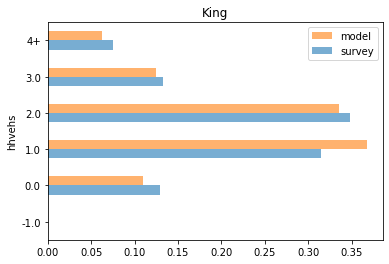

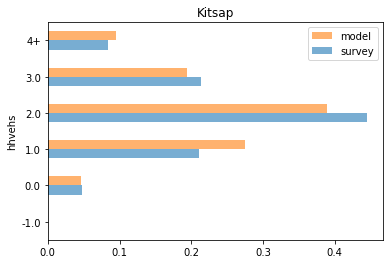

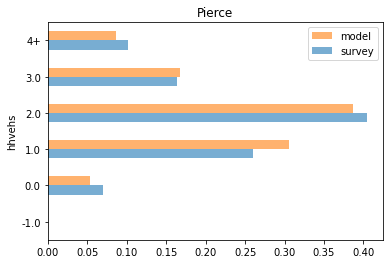

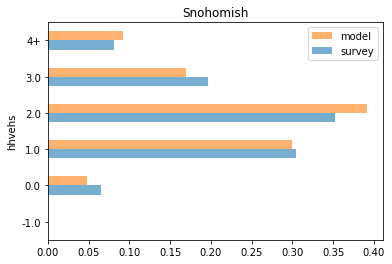

In [16]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                          
Work County      King  Kitsap  Pierce Snohomish
Home County                                    
King        1,175,208     843  43,392    39,322
Kitsap          5,089 109,625   4,722        38
Pierce         99,206   9,885 297,478       666
Snohomish     150,262      87     806   277,477